<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر بیگی
</font>
<p></p>
<br>
<font>
<b>تمرین سوم</b>
</font>
<br>
<br>
موعد تحویل: ۴ دی <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<span style="color: red;">
<div dir='rtl'>

<b> نام و نام‌‌خانوادگی: </b>
امیرحسین خوشبخت

<b> شماره دانشجویی: </b>
99105429
<b> لینک colab: </b>

https://colab.research.google.com/drive/108QrQFTccxLLKFghG9YtXFb8w-0_DgLb#scrollTo=kLNK2kR_NXxy</div>
</span>

<div dir='rtl'>
<h1>
مقدمه
</h1>
<p>
در این تمرین قصد داریم به مباحث زیر بپردازیم:
<li> embedding </li>
<li> کلاسه‌بندی متن </li>
<li> کاهش ابعاد </li>
<li> خوشه‌بندی متن و هرس‌کردن خوشه‌ها</li>

دیتاست این تمرین از دیتاست‌های kaggle انتخاب شده‌است و لینک آن در بخش اول تمرین در اختیار شما قرار داده شده است.

کتابخانه‌های مورد نظرتان را هم می‌توانید در اولین سل نوت‌بوک فراخوانی کنید.
</p>
</div>

In [ ]:
!pip install opendatasets
!pip install pandas
!pip install nltk
!pip install fasttext
!pip install kaggle

import json
api_token = {"username":"amirhosseinkhb","key":"fc4b8fa04b5b9aaf01ce36d62c0ab2e9"}

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

import opendatasets as od
import kaggle
import pandas as pd
import numpy as np
import string
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import fasttext
import sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 774.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199776 sha256=303c8fa6d49e473f1b400ddb48558c0f890070858171ad41987d757ca361ac95
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


<div dir='rtl'>
<h1>1.
دریافت و آماده‌سازی دیتاست
</h1>
<p>
دیتاست استفاده شده در این تمرین، مجموعه‌ای عناوین، خلاصه، و ژانر چندین کتاب است.
این دیتاست در kaggle موجود است.
ابتدا این دیتاست را با استفاده از kaggle api دریافت کنید و سپس آن را لود کنید.
<br/>
لینک دیتاست: https://www.kaggle.com/datasets/athu1105/book-genre-prediction
<br>
<i>در صورتی که با خطای 443 مواجه شدید، یا از پراکسی استفاده کنید یا از کولب.</i>
</p>
</div>

In [ ]:
# TODO: Download Dataset (https://www.kaggle.com/datasets/athu1105/book-genre-prediction) Using Kaggle API
!kaggle datasets download -d athu1105/book-genre-prediction

  0% 0.00/3.73M [00:00<?, ?B/s]
100% 3.73M/3.73M [00:00<00:00, 156MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/book-genre-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# TODO: Load Dataset into df
df = pd.read_csv('data.csv')
print(df.head())

   index                      title    genre  \
0      0          Drowned Wednesday  fantasy   
1      1              The Lost Hero  fantasy   
2      2  The Eyes of the Overworld  fantasy   
3      3            Magic's Promise  fantasy   
4      4             Taran Wanderer  fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...  


In [ ]:
# TODO: Perform data cleaning and eda (you can add cells here)
# حذف سطرهایی که دارای مقادیر خالی هستند
df = df.dropna()

# بررسی اینکه آیا هنوز سطری با مقدار خالی وجود دارد
print(df.isnull().sum())

# تعداد منحصر به فرد در هر ستون
print(df.nunique())

# توزیع ژانرها
print(df['genre'].value_counts())

# تعداد کلمات در خلاصه
df['word_count'] = df['summary'].apply(lambda x: len(str(x).split()))
print(df['word_count'].describe())


index      0
title      0
genre      0
summary    0
dtype: int64
index      4657
title      4296
genre        10
summary    4542
dtype: int64
thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: genre, dtype: int64
count    4657.000000
mean      359.148594
std       437.584315
min         1.000000
25%       118.000000
50%       193.000000
75%       436.000000
max      5663.000000
Name: word_count, dtype: float64


<div dir='rtl'>
<p>
حال در این مرحله، به پیش‌پردازش متن می‌پردازیم. این پیش‌پردازش باید روی هر دو ستون title و summary اعمال شود.
برای پیش‌پردازش نیازی نیست که هرکدام از اعمال پیش‌پردازش را خودتان مانند تمارین قبل پیاده کنید. برای پیاده‌سازی تابع زیر می‌توانید از کتابخانه‌های معمول برای این کار بهره ببرید.
</p>
</div>

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """

    # Tokenize text
    tokens = word_tokenize(text)

    # Convert to lowercase
    if lower_case:
        tokens = [token.lower() for token in tokens]

    # Remove punctuations
    if punctuation_removal:
        tokens = [''.join(c for c in token if c not in string.punctuation) for token in tokens]
        tokens = [token for token in tokens if token]

    # Remove stopwords
    if stopword_removal:
        stop_words = set(stopwords.words('english'))
        stop_words.update(stopwords_domain)
        tokens = [token for token in tokens if token not in stop_words]

    # Filter based on minimum length
    tokens = [token for token in tokens if len(token) >= minimum_length]

    return tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# TODO: Apply preprocess text on both title and summary columns
df['title'] = df['title'].apply(preprocess_text)
df['summary'] = df['summary'].apply(preprocess_text)

<div dir="rtl">
در نهایت بعد از اپلای کردن پیش‌پردازش روی هر دو ستون، دو ستون پیش‌پردازش شده را با هم ادغام کنید و آن را در یک آرایه به نام X قرار دهید.
</div>

In [ ]:
# TODO: Merge preprocessed columns
# ادغام دو ستون 'title' و 'summary'
df['merged'] = df['title'] + df['summary']

# تبدیل ستون ادغام شده به یک آرایه و قرار دادن آن در X
X = df['merged'].values
for i, text in enumerate(X):
    if not text:
        print(f"Text at index {i} is empty.")



<div dir="rtl">
<h2>1-1.
Embedding
</h2>

در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر کتاب برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
</div>

In [ ]:
import fasttext
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

class FastTextMe:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        # Preprocess texts if preprocessor is provided
        if self.preprocessor:
            texts = [self.preprocessor(text) for text in texts]

        # Write texts to a temporary file as required by fastText training
        with open('temp.txt', 'w') as f:
            for text in texts:
                f.write(' '.join(text) + '\n')

        # Train fastText model
        if self.method == 'skipgram':
            self.model = fasttext.train_unsupervised('temp.txt', model='skipgram')
        else:
            self.model = fasttext.train_unsupervised('temp.txt', model='cbow')

    def get_query_embedding(self, query, tf_idf_vectorizer):
    # Preprocess query if preprocessor is provided
       if self.preprocessor:
          query = self.preprocessor(query)

    # Get TF-IDF weights
       tf_idf_weights = tf_idf_vectorizer.transform([query])

    # Get tokens and corresponding weights
       tokens = tf_idf_vectorizer.get_feature_names_out()
       weights = tf_idf_weights.toarray()[0]

    # Get indices of tokens in the query
       indices = [np.where(tokens == token)[0][0] for token in query.split() if token in tokens]

       embedding = np.average([self.model.get_word_vector(token) for token in query.split() if token in tokens],
                            weights=[weights[index] for index in indices], axis=0)

       return embedding



    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)

    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()


In [ ]:
from gensim.models import FastText
from sklearn.feature_extraction.text import TfidfVectorizer
# TODO: Train fasttext on X
# ساخت یک نمونه از کلاس FastText
ft = FastTextMe()

# آموزش مدل بر روی داده‌های X
ft.train(X)

# استخراج امبدینگ‌ها با استفاده از مدل FastText
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectorizer.fit([' '.join(text) for text in X])



TfidfVectorizer()

In [ ]:
# TODO: Get nearest neighbors of an arbitrary word using fasttext
# انتخاب یک کلمه به صورت تصادفی
word = 'animal'
# پیدا کردن 10 همسایه نزدیک به کلمه انتخاب شده
neighbors = ft.model.get_nearest_neighbors(word, k=10)

# چاپ همسایه‌ها
for neighbor in neighbors:
    print(neighbor)


(0.9497581124305725, 'animals')
(0.8203475475311279, 'animate')
(0.8144185543060303, 'mammals')
(0.7977648973464966, 'males')
(0.7975859045982361, 'spirals')
(0.7966043949127197, 'rabies')
(0.7965574860572815, 'incurables')
(0.7953076362609863, 'giants')
(0.7940779328346252, 'crystals')
(0.7936885952949524, 'creatures')


<div dir="rtl">
در این مرحله آرایه X را روی TFIDF فیت می‌کنیم.
</div>

In [ ]:

class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        # Convert list of lists into list of strings
        data = [' '.join(text) for text in data]

        # Fit the vectorizer on the data
        self.vectorizer.fit(data)


In [ ]:
# ساخت یک نمونه از کلاس TF_IDF
tfidf = TF_IDF()

# فیت کردن vectorizer بر روی داده‌های X
tfidf.fit_vectorizer(X)


In [ ]:

# TODO: Get Embedding of an arbitrary query using your prior implemention
# تعریف یک پرسش دلخواه
query = "As the book opens"
embedding = ft.get_query_embedding(query, tfidf.vectorizer)

<div dir="rtl">
در نهایت، تمامی entry های درون X را به صورت امبدینگ دربیاورید و آن را در X ذخیره کنید.
</div>

In [ ]:

# محاسبه امبدینگ برای هر سند در X
X_embedded = np.array([ft.get_query_embedding(' '.join(text), tfidf.vectorizer) for text in X])

# ذخیره امبدینگ‌ها در X
X = X_embedded



In [ ]:

# ذخیره امبدینگ‌ها در یک فایل
#np.save('embeddings.npy', X)



In [40]:

# بارگذاری امبدینگ‌ها از فایل
X = np.load('embeddings.npy')

<div dir='rtl'>
<h2>1-2.
آماده‌سازی داده تمرین و تست
</h2>
<p>
در این بخش ابتدا می‌خواهیم تا داده‌ای که می‌خواهیم بر اساس آن کلاسه‌بندی کتاب‌ها را انجام دهیم، که همان ژانر کتاب‌ها است را انکود کنیم.
<br>
سپس با جداسازی داده آموزش و تست، به آموزش مدل‌های کلاسه‌بند می‌پردازیم.
</p>
</div>

In [62]:
# TODO: Encode genres with values between 0 and n_classes-1 and save it in array Y
from sklearn.preprocessing import LabelEncoder

# ساخت یک نمونه از کلاس LabelEncoder
le = LabelEncoder()

# انکود کردن ژانر کتاب‌ها و ذخیره آن در Y
Y = le.fit_transform(df['genre'])


In [67]:
# TODO: Split data into train and test (test size = 20%)
from sklearn.model_selection import train_test_split

# تقسیم داده به دو بخش آموزش و تست
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train)
print("_________________")
print(Y_train)

[[-0.15607053  0.20119861 -0.16721044 ... -0.08567728 -0.17749981
  -0.20370239]
 [-0.30737991  0.27340522 -0.12076665 ... -0.10930069 -0.17266526
  -0.22285941]
 [-0.10932023  0.25398001 -0.07882577 ... -0.13521169 -0.12313666
  -0.2593389 ]
 ...
 [-0.21805354  0.29936395 -0.06149356 ... -0.19110055 -0.22382372
  -0.21202085]
 [-0.09764844  0.29655317  0.01198484 ... -0.10285438 -0.2738808
  -0.22542944]
 [-0.11308363  0.24498354 -0.06091472 ... -0.04090544 -0.22359532
  -0.1828772 ]]
_________________
[8 8 3 ... 2 8 6]


<div dir="rtl">
<h1>2.
کلاسه‌بندی متن
</h1>
در این بخش می‌خواهیم تا با استفاده از داده‌هایی که داریم، سه مدل کلاسه‌بندی متن را آموزش دهیم و عملکرد آن‌ها را با هم مقایسه کنیم.
</div>

<div dir="rtl">
<h2>2-1.
SVM و Naive Bayes
</h2>
با استفاده از توابع آماده در sklearn، کلاسه‌بند SVM و Naive Bayes را روی داده آموزش تمرین دهید. سپس، ژانر داده تست را با استفاده از مدل آموزش داده شده پیش‌بینی کنید و آن را در آرایه‌های NB_prediction و SVM_prediction ذخیره کنید.</div>

In [64]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# ساخت یک نمونه از کلاس SVC و GaussianNB
svm = SVC()
nb = GaussianNB()

# آموزش مدل‌ها بر روی داده آموزش
svm.fit(X_train, Y_train)
nb.fit(X_train, Y_train)

# پیش‌بینی ژانر داده تست با استفاده از مدل آموزش داده شده
SVM_prediction = svm.predict(X_test)
NB_prediction = nb.predict(X_test)


In [ ]:
# TODO: Predict on X_test using the trained models
# پیش‌بینی با استفاده از مدل SVM
SVM_prediction = svm.predict(X_test)

# پیش‌بینی با استفاده از مدل Naive Bayes
NB_prediction = nb.predict(X_test)


<div dir="rtl">
<h2>2-2.  
Rocchio
</h2>
می‌خواهیم روش Rocchio را از
پایه پیاده‌سازی کنیم.
با توجه به شواهد نوشته شده هر تابع را کامل کنید و با آموزش مدل روی داده‌های train
لیبل‌های داده‌های test
را پیش بینی کنید و آن را در rocchio_prediction ذخیره کنید.
</div>

In [ ]:
from scipy.spatial import distance

class RocchioTextClassifier:
    def __init__(self, preprocessor=None):
        self.preprocessor = preprocessor
        self.centroids = None

    def calculate_centroids(self, X, y):
        self.centroids = {}
        classes = np.unique(y)
        for c in classes:
            class_vectors = X[y == c]
            self.centroids[c] = np.mean(class_vectors, axis=0)

    def predict_label(self, x):
        min_distance = float('inf')
        label = None
        for c, centroid in self.centroids.items():
            dist = distance.euclidean(x, centroid)
            if dist < min_distance:
                min_distance = dist
                label = c
        return label

    def predict(self, X):
        return np.array([self.predict_label(x) for x in X])


In [ ]:
# TODO: Train your Rocchio implementation on X_train and Y_train
rocchio = RocchioTextClassifier()
rocchio.calculate_centroids(X_train, Y_train)
rocchio_prediction = rocchio.predict(X_test)


In [ ]:
# TODO: Predict on X_test using the trained model
rocchio_prediction = rocchio.predict(X_test)


<div dir="rtl">
<h2>2-3.
ارزیابی
</h2>
برای هر سه روش پیاده‌سازی شده، معیار‌های ارزیابی زیر را بررسی کنید.
<br>
f1 score, accuracy, precision, recall
<br>
سپس، نتایج به دست آمده را با هم در چهار نمودار مقایسه کنید.
</div>

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


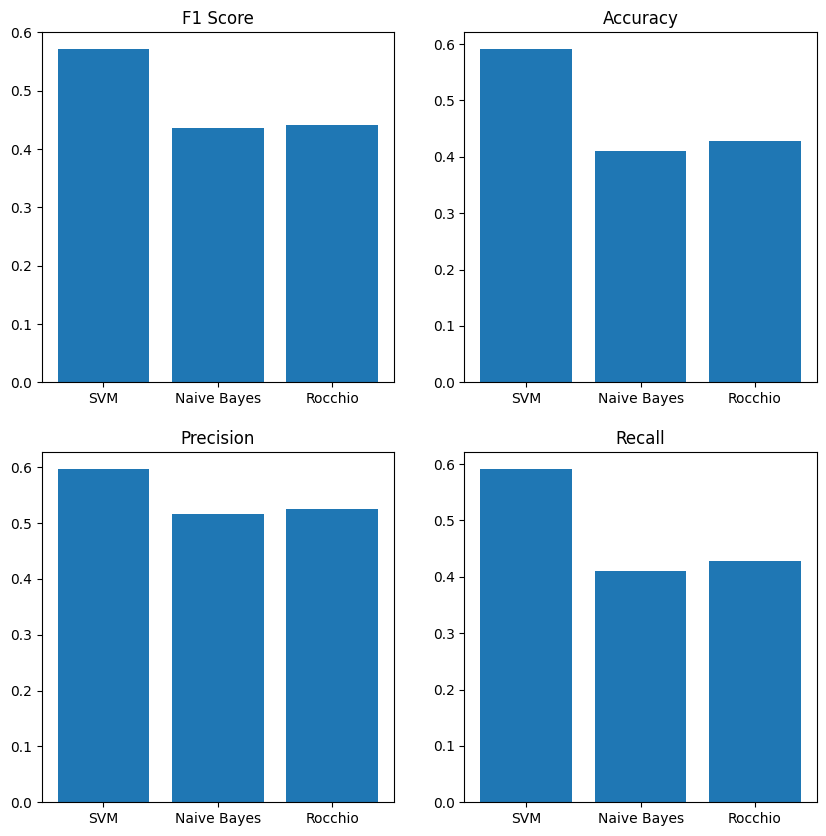

In [ ]:
# TODO: Run evaluation metrics on the predictions
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# محاسبه معیار‌های ارزیابی برای هر مدل
metrics = {
    'SVM': {
        'f1_score': f1_score(Y_test, SVM_prediction, average='weighted'),
        'accuracy': accuracy_score(Y_test, SVM_prediction),
        'precision': precision_score(Y_test, SVM_prediction, average='weighted'),
        'recall': recall_score(Y_test, SVM_prediction, average='weighted')
    },
    'Naive Bayes': {
        'f1_score': f1_score(Y_test, NB_prediction, average='weighted'),
        'accuracy': accuracy_score(Y_test, NB_prediction),
        'precision': precision_score(Y_test, NB_prediction, average='weighted'),
        'recall': recall_score(Y_test, NB_prediction, average='weighted')
    },
    'Rocchio': {
        'f1_score': f1_score(Y_test, rocchio_prediction, average='weighted'),
        'accuracy': accuracy_score(Y_test, rocchio_prediction),
        'precision': precision_score(Y_test, rocchio_prediction, average='weighted'),
        'recall': recall_score(Y_test, rocchio_prediction, average='weighted')
    }
}

# رسم نمودار‌ها
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].bar(metrics.keys(), [m['f1_score'] for m in metrics.values()])
axs[0, 0].set_title('F1 Score')

axs[0, 1].bar(metrics.keys(), [m['accuracy'] for m in metrics.values()])
axs[0, 1].set_title('Accuracy')

axs[1, 0].bar(metrics.keys(), [m['precision'] for m in metrics.values()])
axs[1, 0].set_title('Precision')

axs[1, 1].bar(metrics.keys(), [m['recall'] for m in metrics.values()])
axs[1, 1].set_title('Recall')

plt.show()


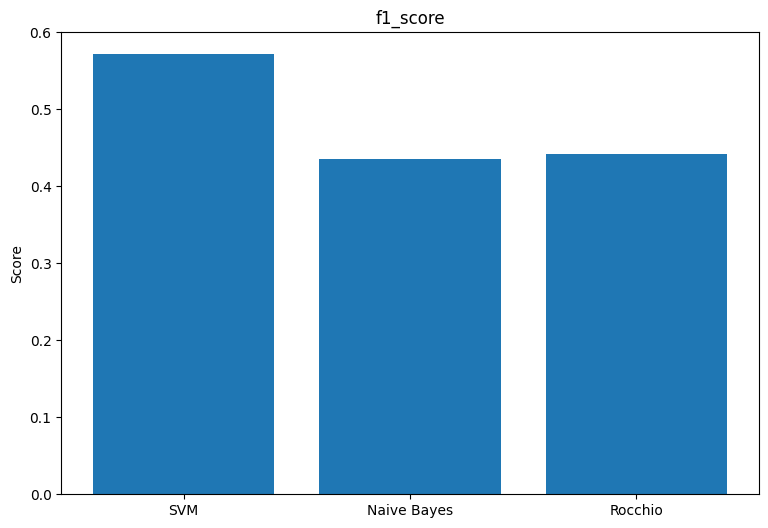

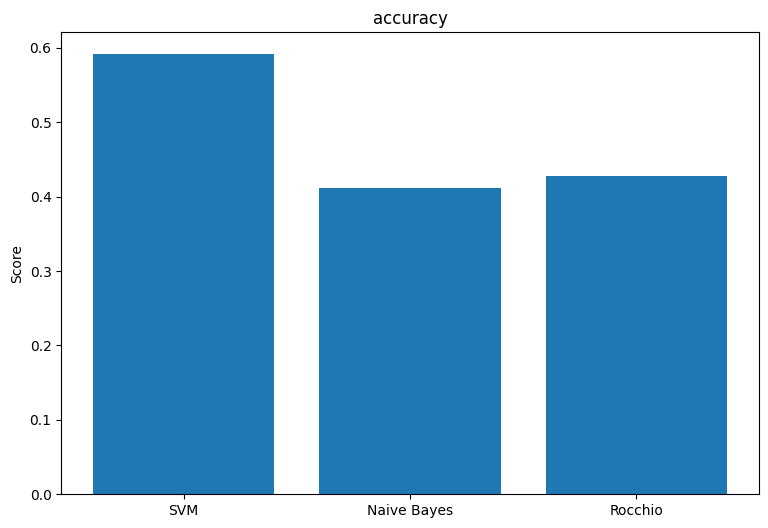

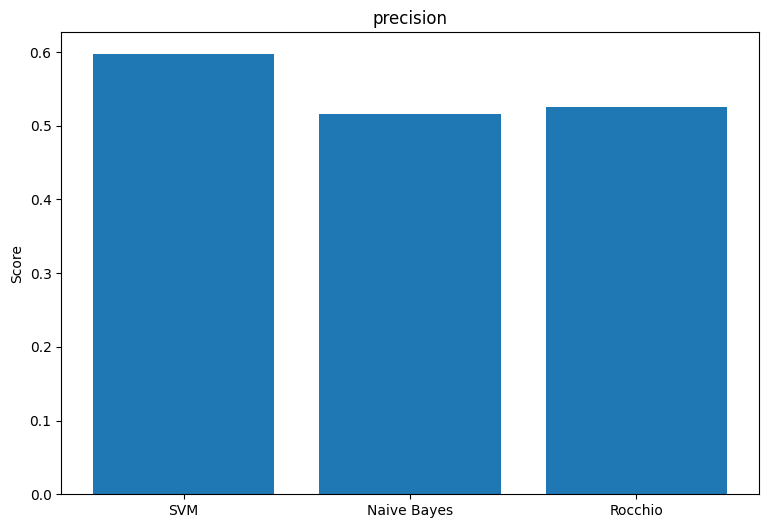

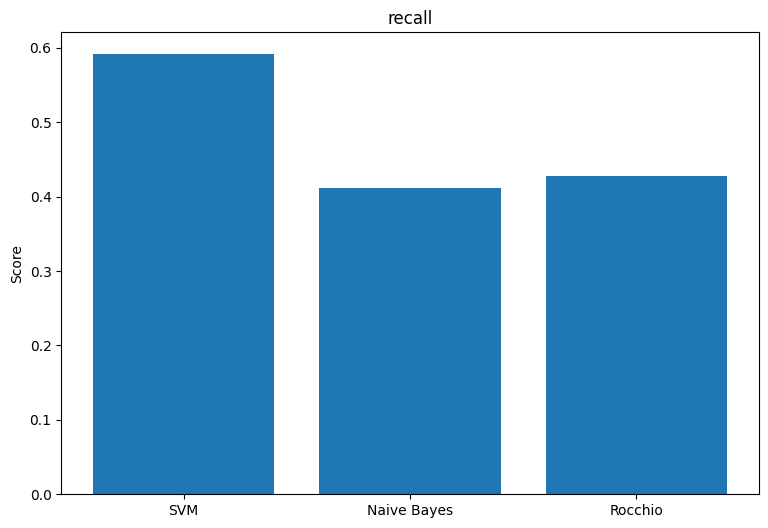

In [43]:
# TODO: Plot evaluations
import matplotlib.pyplot as plt

# Extract evaluation metrics from the 'metrics' dictionary
evaluation_metrics = {
    'f1_score': [metrics[model]['f1_score'] for model in metrics],
    'accuracy': [metrics[model]['accuracy'] for model in metrics],
    'precision': [metrics[model]['precision'] for model in metrics],
    'recall': [metrics[model]['recall'] for model in metrics]
}

# Plot each evaluation metric
for metric, values in evaluation_metrics.items():
    plt.figure(figsize=(9, 6))
    plt.bar(['SVM', 'Naive Bayes', 'Rocchio'], values)
    plt.title(metric)
    plt.ylabel('Score')
    plt.show()


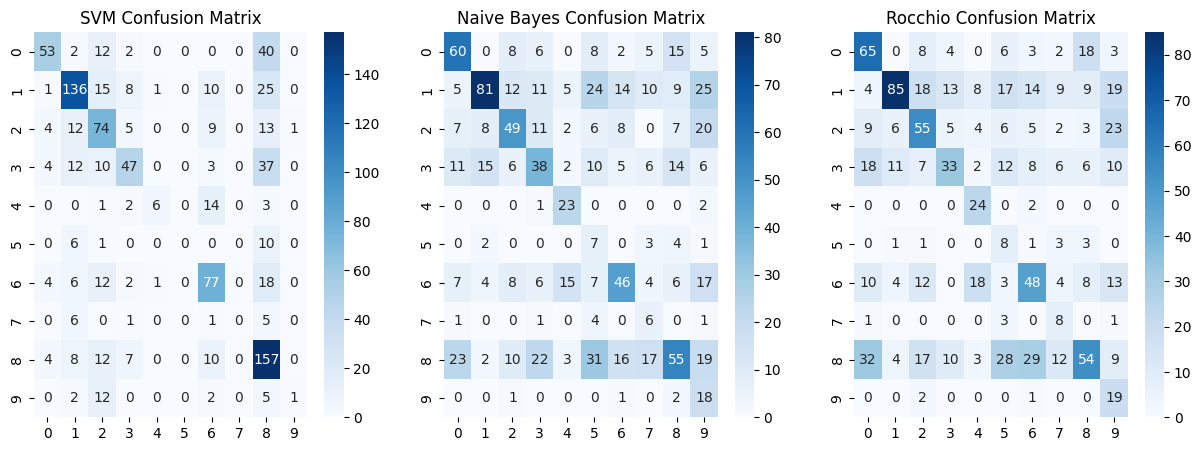

In [44]:
# TODO: Draw confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# محاسبه ماتریس درهم‌ریختگی برای هر مدل
svm_cm = confusion_matrix(Y_test, SVM_prediction)
nb_cm = confusion_matrix(Y_test, NB_prediction)
rocchio_cm = confusion_matrix(Y_test, rocchio_prediction)

# رسم ماتریس درهم‌ریختگی
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(svm_cm, annot=True, ax=axs[0], cmap='Blues', fmt='g')
axs[0].set_title('SVM Confusion Matrix')

sns.heatmap(nb_cm, annot=True, ax=axs[1], cmap='Blues', fmt='g')
axs[1].set_title('Naive Bayes Confusion Matrix')

sns.heatmap(rocchio_cm, annot=True, ax=axs[2], cmap='Blues', fmt='g')
axs[2].set_title('Rocchio Confusion Matrix')

plt.show()


<div dir="rtl">
کدام مدل از همه دقیق‌تر عمل کرد؟ نتیجه‌گیری و تحلیل خود از نتایج ارزیابی را گزارش دهید.
</div>

<span style="color: red;">#TODO: Write your answer in here.</span>


<div dir="rtl">
<h1>3.
کاهش ابعاد و خوشه‌بندی متن
</h1>
</div>

<div dir="rtl">
<h2>3-1.
کاهش ابعاد
</h2>
</div>

<div dir="rtl">
<h3>3-1-1.
PCA
</h3>
یکی از روش‌های کاهش ابعاد، PCA است. با استفاده از پیاده‌سازی آن در کتابخانه sklearn، ابعاد ویژگی‌های X را کاهش دهید.
<br>
سپس با استفاده از explained_variance_ratio_ در الگوریتم PCA  نشان دهید که با وجود یک ترشولد 90 درصد تا چه میزان میتوان ابعاد ویژگی ها را کم تر کرد.
</div>

In [ ]:
from sklearn.decomposition import PCA

def reduce_dimension(embedding, n_components):
    """
    Performs dimensional reduction using PCA with n components left behind

    Parameters
    ----------
    embeddings : List
        A list of embeddings of documents

    n_components: int
        Number of components to keep

    Returns a list of reduced embeddings
    """
    # ساخت یک نمونه از PCA با تعداد مشخص شده از اجزا
    pca = PCA(n_components=n_components)

    # اجرای PCA بر روی داده‌ها
    reduced_embedding = pca.fit_transform(embedding)

    return reduced_embedding


<div dir="rtl">
در این قسمت می‌توانید برای شهود بهتر، نمودار رسم کنید و همچنین برای ساده‌تر شدن کار، از pipeline‌های sklearn بهره ببرید.
<br>
<i> انجام این کار‌ها صرفا توصیه است و اجباری نیست. </i>
</div>

In [45]:
# TODO: Findout the most reduced dimension which has 90% cutoff explained variance.
from sklearn.decomposition import PCA
import numpy as np

# ساخت یک نمونه از PCA
pca = PCA()

# اجرای PCA بر روی داده‌ها
pca.fit(X)

# محاسبه تعداد ابعادی که حداقل 90 درصد از واریانس را توضیح می‌دهند
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1

print(f"The number of dimensions that explain at least 90% of the variance is: {n_components}")


The number of dimensions that explain at least 90% of the variance is: 24


<div dir="rtl">
<h3>3-1-2.
TSNE
</h3>
<br>
     برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</div>


In [46]:
from sklearn.manifold import TSNE

def convert_to_2d_tsne(emb_vecs):
    """
    Converts each raw embedding vector to 2d vector

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns a list of 2d vectors
    """
    # ساخت یک نمونه از T-SNE با دو بعد
    tsne = TSNE(n_components=2)

    # اجرای T-SNE بر روی داده‌ها
    reduced_vecs = tsne.fit_transform(emb_vecs)

    return reduced_vecs


In [47]:
# TODO: Uncomment the following code
X_2d = convert_to_2d_tsne(np.array(X))

<div dir="rtl">
<h2>3-2.
خوشه‌بندی
</h2>
</div>

<div dir="rtl">
<h3>3-2-1.
K-Means
</h3>

<div dir="rtl">
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را
<u><b>از پایه</b></u>
 پیاده‌سازی می‌کنید.

</div>

In [48]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np

def cluster_kmeans(emb_vecs, n_clusters):
    """
    Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    n_clusters: int
        Number of clusters

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """
    # تبدیل لیست بردارها به یک آرایه numpy
    emb_matrix = np.array(emb_vecs)

    # انتخاب تصادفی مراکز اولیه
    initial_centroids = emb_matrix[np.random.choice(len(emb_vecs), n_clusters, replace=False)]

    while True:
        # اختصاص هر نقطه به نزدیک‌ترین مرکز
        cluster_indices = pairwise_distances_argmin(emb_matrix, initial_centroids)

        # محاسبه مراکز جدید
        new_centroids = np.array([emb_matrix[cluster_indices == i].mean(0) for i in range(n_clusters)])

        # اگر مراکز تغییر نکردند، حلقه را متوقف کنید
        if np.all(initial_centroids == new_centroids):
            break

        initial_centroids = new_centroids

    return initial_centroids.tolist(), cluster_indices.tolist()


<div dir="rtl">



 با استفاده از K-Means خوشه‌های اسناد را ایجاد کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های مختلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید.
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
</div>

In [76]:
from sklearn.metrics import confusion_matrix
import numpy as np

def purity_score(y_true, y_pred):
    """
    Calculate the purity score for the given cluster assignments and ground truth classes

    y_true: list
        ground truth labels for each document

    y_pred: list
        predicted labels for each document

    Returns a purity score between 0.0 and 1.0 (higher is better)
    """
    # محاسبه ماتریس درهم‌ریختگی
    cm = confusion_matrix(y_true, y_pred)

    # محاسبه امتیاز خلوص
    return np.sum(np.amax(cm, axis=0)) / np.sum(cm)


In [77]:
from sklearn.metrics import silhouette_score

# محدوده تعداد خوشه‌ها
k_values = range(2, 11)

# لیست برای ذخیره امتیازات سیلوئت و خلوص
sil_scores = []  # تغییر نام متغیر
pur_scores = []  # تغییر نام متغیر

for k in k_values:
    # اجرای الگوریتم K-میانگین برای k خوشه
    _, cluster_indices = cluster_kmeans(X_train, k)

    # محاسبه امتیاز سیلوئت
    s_score = silhouette_score(X_train, cluster_indices)  # تغییر نام متغیر
    sil_scores.append(s_score)

    # محاسبه امتیاز خلوص
    p_score = purity_score(Y_train, cluster_indices)  # تغییر نام متغیر
    pur_scores.append(p_score)

# چاپ امتیازات سیلوئت و خلوص
for k, s_score, p_score in zip(k_values, sil_scores, pur_scores):
    print(f"k={k}, Silhouette Score: {s_score}, Purity Score: {p_score}")


k=2, Silhouette Score: 0.14352514811502456, Purity Score: 0.2214765100671141
k=3, Silhouette Score: 0.08495393257770566, Purity Score: 0.22281879194630871
k=4, Silhouette Score: 0.0693743046622813, Purity Score: 0.2716778523489933
k=5, Silhouette Score: 0.06951875204693309, Purity Score: 0.3597315436241611
k=6, Silhouette Score: 0.07323750425189711, Purity Score: 0.3685906040268456
k=7, Silhouette Score: 0.0628333556740369, Purity Score: 0.36080536912751676
k=8, Silhouette Score: 0.04958854164228489, Purity Score: 0.3814765100671141
k=9, Silhouette Score: 0.0561804356095548, Purity Score: 0.3457718120805369
k=10, Silhouette Score: 0.056386132246594944, Purity Score: 0.37208053691275167


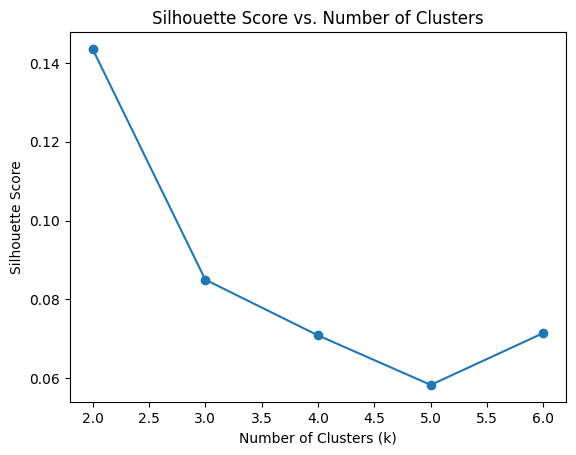

In [80]:
# TODO: Plot silhouette score for different value of k (at least 5 different k values)
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# تعریف یک لیست برای ذخیره امتیازات سیلوئت
silhouette_scores = []

# تعریف یک لیست از مقادیر مختلف k
k_values = [2, 3, 4, 5, 6]

for k in k_values:
    # اجرای الگوریتم K-means برای هر مقدار k
    _, cluster_indices = cluster_kmeans(X_train, k)

    # محاسبه امتیاز سیلوئت و اضافه کردن آن به لیست
    score = silhouette_score(X_train, cluster_indices)
    silhouette_scores.append(score)

# رسم نمودار
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


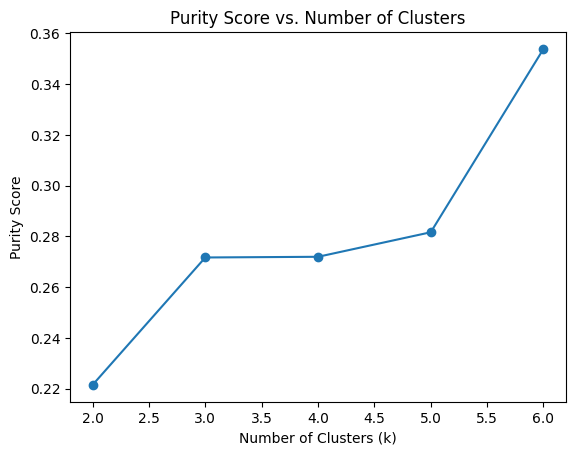

In [81]:
#TODO: plot purity for different value of k (at least 5 different k values)
import matplotlib.pyplot as plt

# تعریف یک لیست برای ذخیره امتیازات خلوص
purity_scores = []

# تعریف یک لیست از مقادیر مختلف k
k_values = [2, 3, 4, 5, 6]

for k in k_values:
    # اجرای الگوریتم K-means برای هر مقدار k
    _, cluster_indices = cluster_kmeans(X_train, k)

    # محاسبه امتیاز خلوص و اضافه کردن آن به لیست
    score = purity_score(Y_train, cluster_indices)
    purity_scores.append(score)

# رسم نمودار
plt.plot(k_values, purity_scores, marker='o')
plt.title('Purity Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Purity Score')
plt.show()


<div dir="rtl">
با استفاده از نمودارهای رسم شده توضیح دهید بهترین k برای انتخاب در داده ما با استفاده از الگوریتم K-Means چیست؟
چرا؟
</div>

<span style="color: red;">بر اساس نمودار سیلوئت، بهترین تعداد خوشه‌ها (k) برابر با 2 است. این به این دلیل است که امتیاز سیلوئت بیشترین مقدار خود را در k=2 دارد. امتیاز سیلوئت نشان‌دهنده‌ی میزان شباهت داده‌ها درون یک خوشه و تفاوت آن‌ها با داده‌های خوشه‌های دیگر است. بنابراین، هرچه امتیاز سیلوئت بیشتر باشد، خوشه‌بندی بهتری انجام شده است.

با این حال، بر اساس نمودار خلوص، بهترین تعداد خوشه‌ها (k) برابر با 6 است. این به این دلیل است که امتیاز خلوص بیشترین مقدار خود را در k=6 دارد. امتیاز خلوص نشان‌دهنده‌ی میزان تطابق برچسب‌های پیش‌بینی شده با برچسب‌های واقعی است. بنابراین، هرچه امتیاز خلوص بیشتر باشد، خوشه‌بندی بهتری انجام شده است.
.</span>

<div dir="rtl">
<h3>3-2-2.
Hierarchical clustering
</h3>
</div>

<div dir="rtl">
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</div>

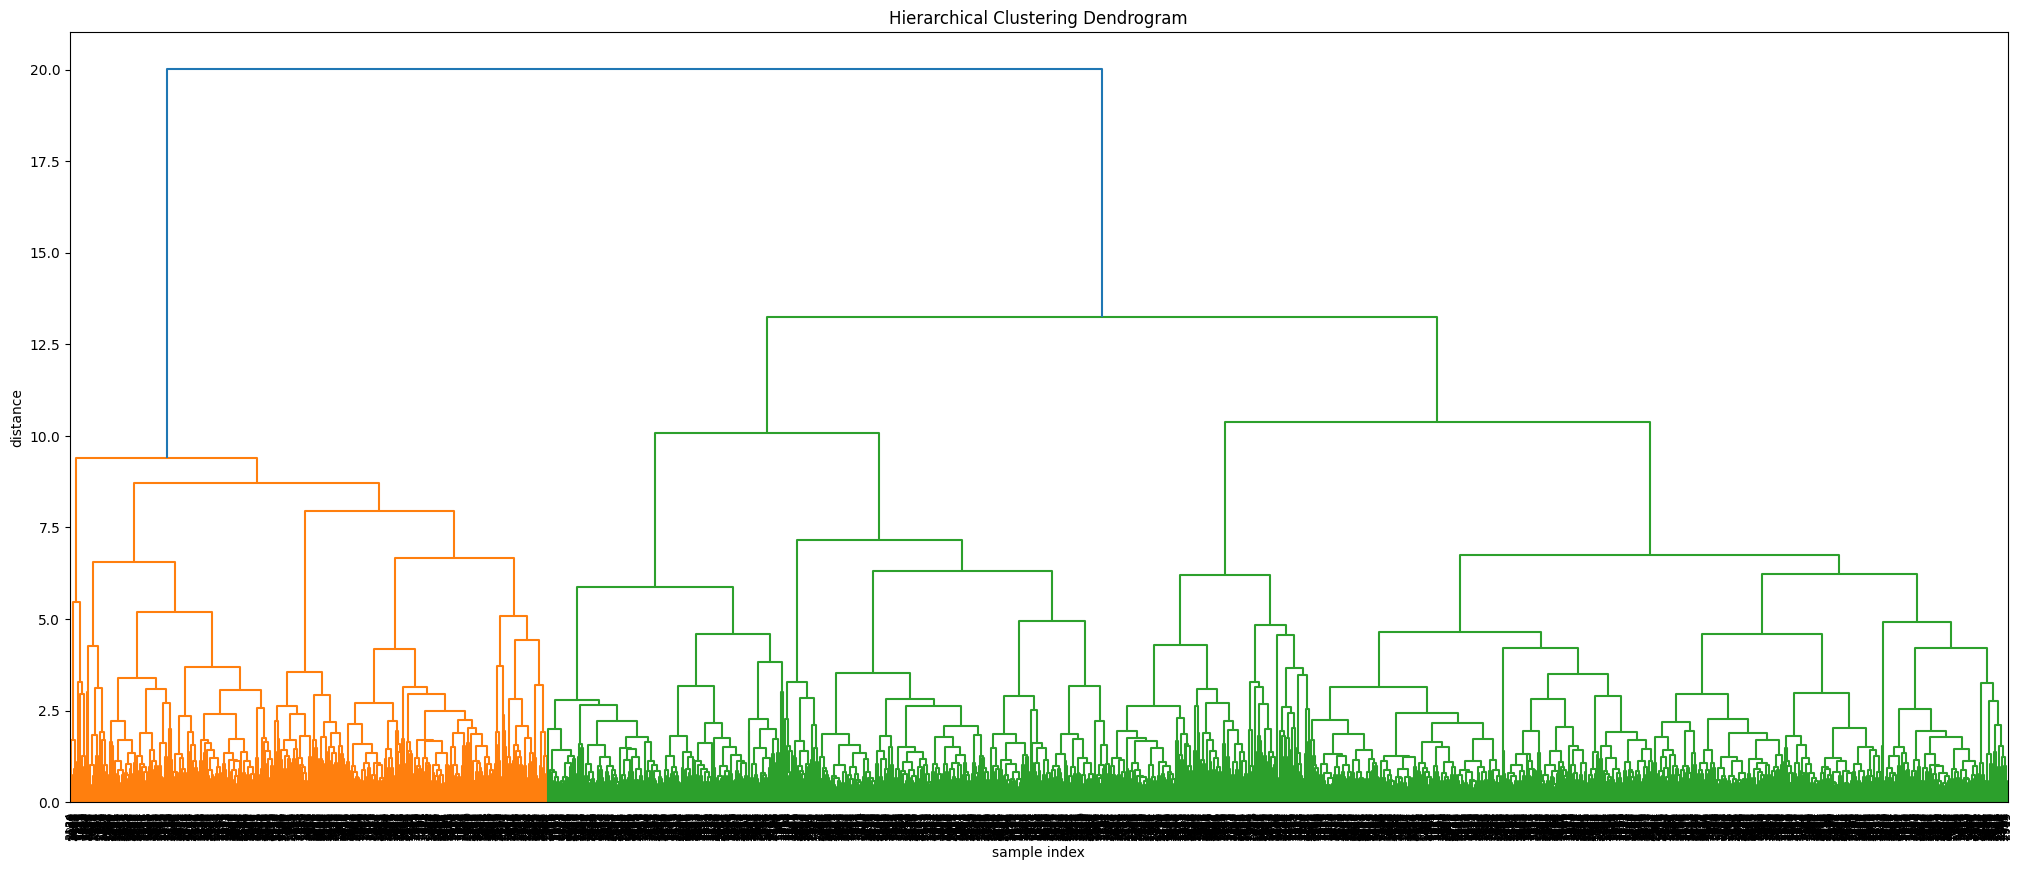

In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# اجرای الگوریتم خوشه‌بندی سلسله‌مراتبی
Z = linkage(X_train, 'ward')

# رسم دندروگرام
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [85]:
# TODO: Plot dendrogram
